In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
station_df = pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/air pollution analysis/air pollution_mesuring station.csv')
monthlydata_df = pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/air pollution analysis/air pollution_monthly_data.csv')
statuscode_df = pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/air pollution analysis/air pollution_statuscode.csv')
itemcode_df = pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/air pollution analysis/air pollution_itemcode.csv')

In [3]:
station_df.head(3)

,측정소코드,측정소명,공인코드,주소,측정소설립일,측정소폐쇄일,표시순서,사용여부
0,701,성황동,534111,충청남도 천안시 동남구 복자1길 24 문성어린이집,19930901,NaN,1,Y
1,702,백석동,534112,충청남도 천안시 서북구 백석동 백석공단1로 20 백석산업단지 관리사무소,20010101,NaN,2,Y
2,703,성성동,534114,충청남도 천안시 서북구 성성동 1-70 삼성대로변,20080311,NaN,3,Y


In [4]:
#측정소명이 '금산'을 포함하는 데이터 확인
station_df[station_df['측정소명'].str.contains("금산")]

,측정소코드,측정소명,공인코드,주소,측정소설립일,측정소폐쇄일,표시순서,사용여부
23,746,금산읍,534501,충청남도 금산군 금산읍 비호로 69 금산읍사무소,20171214,NaN,19,Y


In [5]:
monthlydata_df.head(3)

,측정월,측정소코드,항목코드,월평균값,상태값,국가기준초과여부,충남기준초과여부,1시간자료최고값,1시간자료최고일시,1시간자료최저값,...,일평균정상상태합,8시간평균최고값,8시간평균최고일,8시간평균최저값,8시간평균최저일,8시간평균국가기준초과합,8시간평균충남기준초과합,8시간평균정상상태합,생성일시,월유효가동률
0,201901,701,1,71.000,SMPL,0,0,204.000,1419.0,19.000,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,99.86
1,201901,701,2,40.000,SMPL,0,0,147.000,1420.0,4.000,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00
2,201901,701,3,0.013,SMPL,0,0,0.043,1313.0,0.003,...,31,0.036,13.0,0.007,10.0,0,0,31,2.020000e+13,100.00


In [6]:
#측정소코드가 '746'인 데이터 확인
monthlydata_df_kumsan = monthlydata_df[monthlydata_df['측정소코드']==746]

In [7]:
monthlydata_df_kumsan.head()

,측정월,측정소코드,항목코드,월평균값,상태값,국가기준초과여부,충남기준초과여부,1시간자료최고값,1시간자료최고일시,1시간자료최저값,...,일평균정상상태합,8시간평균최고값,8시간평균최고일,8시간평균최저값,8시간평균최저일,8시간평균국가기준초과합,8시간평균충남기준초과합,8시간평균정상상태합,생성일시,월유효가동률
258,201901,746,1,55.000,SMPL,0,0,172.000,1419.0,11.000,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00
259,201901,746,2,31.000,SMPL,0,0,115.000,1420.0,4.000,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00
260,201901,746,3,0.017,SMPL,0,0,0.049,2823.0,0.000,...,31,0.039,28.0,0.018,7.0,0,0,31,2.020000e+13,98.78
261,201901,746,4,0.700,SMPL,0,0,1.500,2308.0,0.300,...,31,1.300,14.0,0.500,16.0,0,0,31,2.020000e+13,100.00
262,201901,746,5,0.004,SMPL,0,0,0.011,2311.0,0.002,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00


In [8]:
#측정소코드가 '746'인 데이터를 'KUMSAN'으로 대체
monthlydata_df_kumsan['측정소코드'].replace(746, 'KUMSAN', inplace=True)
monthlydata_df_kumsan.head()

C:\Users\PJH\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,측정월,측정소코드,항목코드,월평균값,상태값,국가기준초과여부,충남기준초과여부,1시간자료최고값,1시간자료최고일시,1시간자료최저값,...,일평균정상상태합,8시간평균최고값,8시간평균최고일,8시간평균최저값,8시간평균최저일,8시간평균국가기준초과합,8시간평균충남기준초과합,8시간평균정상상태합,생성일시,월유효가동률
258,201901,KUMSAN,1,55.000,SMPL,0,0,172.000,1419.0,11.000,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00
259,201901,KUMSAN,2,31.000,SMPL,0,0,115.000,1420.0,4.000,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00
260,201901,KUMSAN,3,0.017,SMPL,0,0,0.049,2823.0,0.000,...,31,0.039,28.0,0.018,7.0,0,0,31,2.020000e+13,98.78
261,201901,KUMSAN,4,0.700,SMPL,0,0,1.500,2308.0,0.300,...,31,1.300,14.0,0.500,16.0,0,0,31,2.020000e+13,100.00
262,201901,KUMSAN,5,0.004,SMPL,0,0,0.011,2311.0,0.002,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00


In [9]:
itemcode_df.head(3)

,항목코드,항목줄임명,항목전체명,단위,관리소수점자리수,표시순서,사용여부
0,1,PM10,미세먼지(PM10),㎍/㎥,0,1,Y
1,2,PM2.5,미세먼지(PM2.5),㎍/㎥,0,2,Y
2,3,O3,오존,ppm,3,3,Y


In [10]:
#itemcode 데이터 extraction
item = itemcode_df['항목줄임명']
item.tail()

20    MPX
21    STR
22    THC
23    NH3
24    BUT
Name: 항목줄임명, dtype: object

In [11]:
#칼럼명 변경 (측정소코드->측정장소)
monthlydata_df_kumsan = monthlydata_df_kumsan.rename({'측정소코드':'측정장소'}, axis='columns')
monthlydata_df_kumsan.head(3)

,측정월,측정장소,항목코드,월평균값,상태값,국가기준초과여부,충남기준초과여부,1시간자료최고값,1시간자료최고일시,1시간자료최저값,...,일평균정상상태합,8시간평균최고값,8시간평균최고일,8시간평균최저값,8시간평균최저일,8시간평균국가기준초과합,8시간평균충남기준초과합,8시간평균정상상태합,생성일시,월유효가동률
258,201901,KUMSAN,1,55.000,SMPL,0,0,172.000,1419.0,11.0,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00
259,201901,KUMSAN,2,31.000,SMPL,0,0,115.000,1420.0,4.0,...,31,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00
260,201901,KUMSAN,3,0.017,SMPL,0,0,0.049,2823.0,0.0,...,31,0.039,28.0,0.018,7.0,0,0,31,2.020000e+13,98.78


In [12]:
#itemcode -> itemcode 관련 실제 성분명으로 대체 함수 알고리즘 생성
def subs(x):
    for i in range(25):
        if x == i + 1:
            y = item[i]
    return y

In [13]:
#아이템 코드 -> 실제 성분명으로 대체
monthlydata_df_kumsan['item_code'] = monthlydata_df_kumsan['항목코드'].apply(lambda x: subs(x))

In [14]:
monthlydata_df_kumsan.head()

,측정월,측정장소,항목코드,월평균값,상태값,국가기준초과여부,충남기준초과여부,1시간자료최고값,1시간자료최고일시,1시간자료최저값,...,8시간평균최고값,8시간평균최고일,8시간평균최저값,8시간평균최저일,8시간평균국가기준초과합,8시간평균충남기준초과합,8시간평균정상상태합,생성일시,월유효가동률,item_code
258,201901,KUMSAN,1,55.000,SMPL,0,0,172.000,1419.0,11.000,...,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00,PM10
259,201901,KUMSAN,2,31.000,SMPL,0,0,115.000,1420.0,4.000,...,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00,PM2.5
260,201901,KUMSAN,3,0.017,SMPL,0,0,0.049,2823.0,0.000,...,0.039,28.0,0.018,7.0,0,0,31,2.020000e+13,98.78,O3
261,201901,KUMSAN,4,0.700,SMPL,0,0,1.500,2308.0,0.300,...,1.300,14.0,0.500,16.0,0,0,31,2.020000e+13,100.00,CO
262,201901,KUMSAN,5,0.004,SMPL,0,0,0.011,2311.0,0.002,...,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00,SO2


In [15]:
# 상태값 'SMPL'만 추출
monthlydata_df_kumsan = monthlydata_df_kumsan[monthlydata_df_kumsan['상태값']=='SMPL']

In [16]:
monthlydata_df_kumsan.head()

,측정월,측정장소,항목코드,월평균값,상태값,국가기준초과여부,충남기준초과여부,1시간자료최고값,1시간자료최고일시,1시간자료최저값,...,8시간평균최고값,8시간평균최고일,8시간평균최저값,8시간평균최저일,8시간평균국가기준초과합,8시간평균충남기준초과합,8시간평균정상상태합,생성일시,월유효가동률,item_code
258,201901,KUMSAN,1,55.000,SMPL,0,0,172.000,1419.0,11.000,...,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00,PM10
259,201901,KUMSAN,2,31.000,SMPL,0,0,115.000,1420.0,4.000,...,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00,PM2.5
260,201901,KUMSAN,3,0.017,SMPL,0,0,0.049,2823.0,0.000,...,0.039,28.0,0.018,7.0,0,0,31,2.020000e+13,98.78,O3
261,201901,KUMSAN,4,0.700,SMPL,0,0,1.500,2308.0,0.300,...,1.300,14.0,0.500,16.0,0,0,31,2.020000e+13,100.00,CO
262,201901,KUMSAN,5,0.004,SMPL,0,0,0.011,2311.0,0.002,...,0.000,NaN,0.000,NaN,0,0,0,2.020000e+13,100.00,SO2


In [17]:
#분석에 필요한 칼럼만 추출
filtered_df = monthlydata_df_kumsan[['측정월','item_code','월평균값']]
filtered_df = filtered_df.reset_index()
filtered_df = filtered_df.drop('index', axis=1)

#날짜 데이터 문자열로 변환 후 Month 정보만 보이도록 slice
filtered_df['측정월'] = filtered_df['측정월'].apply(str)
filtered_df['측정월'] = filtered_df['측정월'].str.slice(start=4, stop=6)
filtered_df

,측정월,item_code,월평균값
0,01,PM10,55.000
1,01,PM2.5,31.000
2,01,O3,0.017
3,01,CO,0.700
4,01,SO2,0.004
...,...,...,...
135,10,SPD,0.800
136,10,TMP,15.000
137,10,TEM,27.300
138,10,HUM,78.100


In [18]:
#item_code 항목별 그룹 생성
code_grouping = filtered_df.groupby('item_code')
code_grouping.head()

,측정월,item_code,월평균값
0,01,PM10,55.000
1,01,PM2.5,31.000
2,01,O3,0.017
3,01,CO,0.700
4,01,SO2,0.004
...,...,...,...
65,05,SPD,1.100
66,05,TMP,18.700
67,05,TEM,26.800
68,05,HUM,56.300


In [19]:
itemcode_df.head()

,항목코드,항목줄임명,항목전체명,단위,관리소수점자리수,표시순서,사용여부
0,1,PM10,미세먼지(PM10),㎍/㎥,0,1,Y
1,2,PM2.5,미세먼지(PM2.5),㎍/㎥,0,2,Y
2,3,O3,오존,ppm,3,3,Y
3,4,CO,일산화탄소,ppm,1,4,Y
4,5,SO2,아황산가스,ppm,3,5,Y


In [20]:
#item code 항목별 데이터 리스트 형식으로 각각 저장
temp = code_grouping.get_group('TMP')['월평균값'].tolist()
co = code_grouping.get_group('CO')['월평균값'].tolist()
nox = code_grouping.get_group('NOx')['월평균값'].tolist()
o3 = code_grouping.get_group('O3')['월평균값'].tolist()
pm_l = code_grouping.get_group('PM10')['월평균값'].tolist()
pm_s= code_grouping.get_group('PM10')['월평균값'].tolist()
month = np.arange(1,11,1)

In [21]:
#성분별 데이터 프레임 생성
df = pd.DataFrame({'Month': month,
                   'Temp': temp,
                   'CO': co,
                   'O3': o3,
                   'PM10':pm_l,
                   'PM2.5':pm_s,},
                   index=[1,2,3,4,5,6,7,8,9,10])
df.head()

,Month,Temp,CO,O3,PM10,PM2.5
1,1,-1.0,0.7,0.017,55.0,55.0
2,2,1.5,0.6,0.026,50.0,50.0
3,3,7.0,0.5,0.038,58.0,58.0
4,4,12.0,0.4,0.037,36.0,36.0
5,5,18.7,0.3,0.052,39.0,39.0


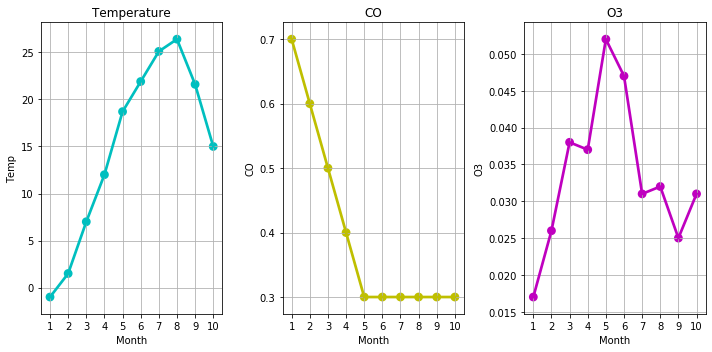

In [22]:
#성분별 plotting(3종 확인 예시)
fig, ax = plt.subplots(1,3, figsize=(10,5))
sns.pointplot(ax=ax[0], x=df.Month, y=df.Temp, color='c')
ax[0].set_title('Temperature')
sns.pointplot(ax=ax[1], x=df.Month, y=df.CO, color='y')
ax[1].set_title('CO')
sns.pointplot(ax=ax[2], x=df.Month, y=df.O3, color='m')
ax[2].set_title('O3')
for i in range(3):
    ax[i].grid()
plt.tight_layout()
display()

In [23]:
#오염성분간 추이 비교를 위한 month 칼럼 삭제
df_measure = df.drop(columns=['Month'])

In [24]:
#minmaxscaler 모듈 import
from sklearn.preprocessing import MinMaxScaler

In [25]:
df_measure.head()

,Temp,CO,O3,PM10,PM2.5
1,-1.0,0.7,0.017,55.0,55.0
2,1.5,0.6,0.026,50.0,50.0
3,7.0,0.5,0.038,58.0,58.0
4,12.0,0.4,0.037,36.0,36.0
5,18.7,0.3,0.052,39.0,39.0


In [26]:
#스케일러 인스턴스 생성 및 transformation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_measure)

In [27]:
scaled_data

array([[0.        , 1.        , 0.        , 0.925     , 0.925     ],
       [0.09124088, 0.75      , 0.25714286, 0.8       , 0.8       ],
       [0.2919708 , 0.5       , 0.6       , 1.        , 1.        ],
       [0.47445255, 0.25      , 0.57142857, 0.45      , 0.45      ],
       [0.7189781 , 0.        , 1.        , 0.525     , 0.525     ],
       [0.83576642, 0.        , 0.85714286, 0.3       , 0.3       ],
       [0.95255474, 0.        , 0.4       , 0.        , 0.        ],
       [1.        , 0.        , 0.42857143, 0.075     , 0.075     ],
       [0.82481752, 0.        , 0.22857143, 0.15      , 0.15      ],
       [0.58394161, 0.        , 0.4       , 0.45      , 0.45      ]])

In [28]:
#스케일링 데이터->데이터프레임 생성
scaled_data_df = pd.DataFrame(scaled_data, columns=df_measure.columns, index=list(df_measure.index.values))

In [29]:
scaled_data_df.head()

,Temp,CO,O3,PM10,PM2.5
1,0.000000,1.00,0.000000,0.925,0.925
2,0.091241,0.75,0.257143,0.800,0.800
3,0.291971,0.50,0.600000,1.000,1.000
4,0.474453,0.25,0.571429,0.450,0.450
5,0.718978,0.00,1.000000,0.525,0.525


In [30]:
month = df['Month']

In [31]:
#month 칼럼과 스케일 데이터 칼럼 합치기
clean_data = pd.concat([month, scaled_data_df], axis=1) #그냥 df['month'] 직접 사용해도 무방

In [32]:
clean_data

,Month,Temp,CO,O3,PM10,PM2.5
1,1,0.000000,1.00,0.000000,0.925,0.925
2,2,0.091241,0.75,0.257143,0.800,0.800
3,3,0.291971,0.50,0.600000,1.000,1.000
4,4,0.474453,0.25,0.571429,0.450,0.450
5,5,0.718978,0.00,1.000000,0.525,0.525
6,6,0.835766,0.00,0.857143,0.300,0.300
7,7,0.952555,0.00,0.400000,0.000,0.000
8,8,1.000000,0.00,0.428571,0.075,0.075
9,9,0.824818,0.00,0.228571,0.150,0.150
10,10,0.583942,0.00,0.400000,0.450,0.450


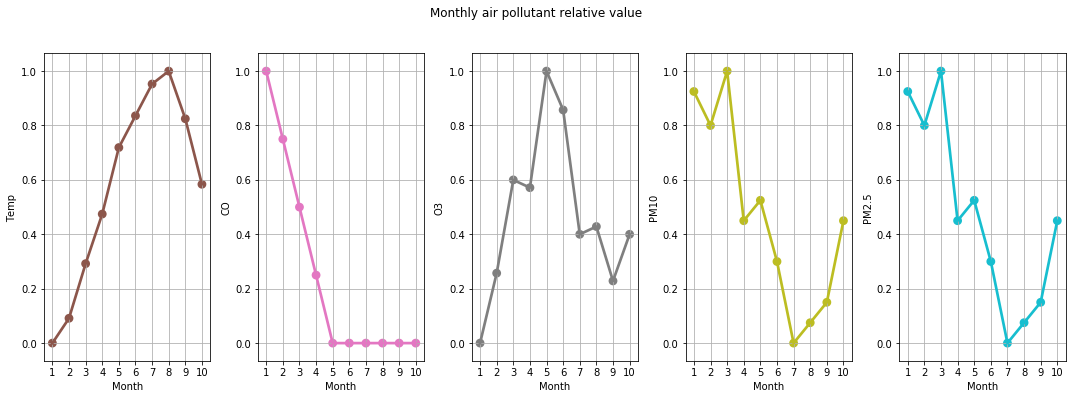

In [34]:
#plotting
fig, ax = plt.subplots(1,5, figsize=(15,5))
sns.pointplot(ax=ax[0], x=clean_data['Month'], y=clean_data['Temp'], color='tab:brown')
sns.pointplot(ax=ax[1], x=clean_data['Month'], y=clean_data['CO'], color='tab:pink')
sns.pointplot(ax=ax[2], x=clean_data['Month'], y=clean_data['O3'], color='tab:gray')
sns.pointplot(ax=ax[3], x=clean_data['Month'], y=clean_data['PM10'], color='tab:olive')
sns.pointplot(ax=ax[4], x=clean_data['Month'], y=clean_data['PM2.5'], color='tab:cyan')
fig.suptitle("Monthly air pollutant relative value", y=1.1)
for i in range(5):
    ax[i].grid()
plt.tight_layout()
display()

In [35]:
#상관관계 인스턴스 생성
corr = clean_data.corr()

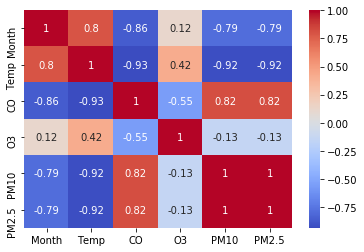

In [36]:
#히트맵 plotting
sns.heatmap(corr, cmap='coolwarm',  annot = True)
display()